<a href="https://colab.research.google.com/github/siliconemonster/AD-TrabalhoFinal/blob/main/Simula%C3%A7%C3%A3o_AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando bibliotecas

In [30]:
import random
from random import sample
from random import random
from matplotlib import pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from collections import Counter
import sympy as sy
from numpy.linalg import matrix_power
from fractions import Fraction
import math
from math import *
import numpy as np
from numpy import random
import pandas as pd
import queue 
from scipy.stats import poisson
import copy
import fractions
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement
from sympy import Matrix
import matplotlib.pyplot as plt

## Funções Auxiliares

In [32]:
def initializeCache():  
  cache = sample([1,2,3], k= 2)
  return cache

In [33]:
def cacheReceivesReq(caso, cacheEnt, conteudo, depurar = False):
  cache = cacheEnt.copy()
  RequisicaoAtendida = 0
  #print("Conteudo Requisitado: " + str(requisicao))
  #print("Cache:" + str(cache))

  if (conteudo in cache):
    if (caso == "FIFO" or caso == "Random" or caso == "Estatica"):
      cache = cache
      RequisicaoAtendida = 1    
      if (depurar): print("Cache possui requisição!")
      if (depurar): print("Cache permanece inalterada.")

    elif (caso == "LRU"):
      RequisicaoAtendida = 1    
      if (depurar): print("Cache possui requisição!")

      if (depurar): print("Conteúdo requisitado ficará na primeira posição.")
      cache.remove(conteudo)
      cache.insert(0, conteudo)
      if (depurar): print("Novo estado da cache: " + str(cache)) 
   
  else:
    if (depurar): print("Cache não possui conteúdo da requisição )=")
    if (depurar): print("Conteúdo requisitado entrará na primeira posição, e o conteúdo da última sairá.") 
    if (caso == "FIFO" or caso == "LRU"):
      cache.insert(0, conteudo)
      del cache[-1]
      if (depurar): print("Novo estado da cache: " + str(cache)) 

    elif (caso == "Random"):
      if (depurar): print("Conteúdo requisitado entrará numa posição aleatória.")
      pos = random.randint(0,2)
      cache[pos] = conteudo
      if (depurar): print("Novo estado da cache: " + str(cache))

    elif (caso == "Estatica"):
      if (depurar): print("Cache permanece inalterada.")
      cache = cache

  return cache, RequisicaoAtendida

## I. Simulação Cenário I

In [6]:

def simulacaoCenario1(numRequisicoes, caso):

  Requisicoes = [[1,3],[2,2],[3,1]]
  cache1 = initializeCache()
  cache2 = initializeCache()
  sucessos = 0 # contador de sucessos
  requisicoes = 0 # contador de requisições

  taxa = [1/3,1/3,1/3]

  while (requisicoes <= numRequisicoes):

    RequicaoAtendida = 0

    evento = Requisicoes[0]
    tempoAtual = evento[0]
    conteudo = evento[1]

    print("Tempo " + str(tempoAtual) + " ocorreu requesição do tipo " + str(conteudo))
    print("Cache 1:" + str(cache1))
    print("Cache 2:" + str(cache2))

    cache1, RequicaoAtendida = cacheReceivesReq(caso, cache1, conteudo)
    cache2, RequicaoAtendida = cacheReceivesReq(caso, cache2, conteudo)  


    if (RequicaoAtendida):
      sucessos = sucessos + 1
      print("Requisição foi atendida yay! \n")
    
    else:
      print("Requisição não foi atendida :/ ! \n")

    del Requisicoes[0]

    tempoAgendado = tempoAtual + np.random.exponential(1/taxa[conteudo-1])
    Requisicoes.append([tempoAgendado,conteudo])  
    Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0])

    requisicoes = requisicoes + 1
    print("Sucessos: " + str(sucessos))


## Parte Analítica

### Cenário 1



Determinamos matrizes de transição dos tipos FIFO, LRU e Random para realizar as nossas análises por cadeias de Markov.<br>
Não ocorre de haver dois conteúdos iguais em uma mesma cache, então nunca teremos os estados AA, BB ou CC. Com isso, a matriz FIFO e a matriz LRU possuem os estados AB, AC, BA, BC, CA e CB. Já a matriz Random e a matriz Estática possuem os estados AB, AC e BC. No caso da Random, como o conteúdo é removido aleatoriamente, não importa a ordem, por exemplo se é AB ou BA, e por isso temos apenas esses 3 estados. E no caso da estática, por ela sempre armazenar os conteúdos mais populares e nunca mudar, a ordem também não importa.

Aqui calcularemos a probabilidade de sucesso utilizando cadeias de Markov para comprovar analíticamente o que fizemos na simulação.

#### Funções

In [34]:
def GeraMatrizTransicao(conteudos, tipo, depurar = False):

  estadosCache = list(permutations(conteudos, 2))
  estadosCache
  estadosCacheS = list(combinations_with_replacement(estadosCache, 2))
  numconteudos = (len(conteudos))

  pares = []

  for i in range (len(estadosCacheS)):
    estado = [''.join(ele) for ele in estadosCacheS[i]]
    indice = estado[0] + estado[1]
    pares.append(indice)  

  matriz = {}
  numColunas = len(pares)
  linha = np.zeros((1, numColunas), dtype=int)
  linha = list(linha[0])
  matrizArray = []

  for i in range(len(pares)):

    cache1 = []
    cache2 = []

    indice = pares[i]

    cache1.append(indice[0])
    cache1.append(indice[1])
    cache2.append(indice[2])
    cache2.append(indice[3])

    matriz[indice] = linha.copy()


    for conteudo in conteudos:

      c1_transicaopraEstado, tinhaConteudo = cacheReceivesReq(tipo, cache1,conteudo, depurar = False)
      c2_transicaopraEstado, tinhaConteudo = cacheReceivesReq(tipo, cache2,conteudo, depurar = False)

      novoEstadoOp1 = c1_transicaopraEstado[0]+c1_transicaopraEstado[1] + c2_transicaopraEstado[0] + c2_transicaopraEstado[1]
      novoEstadoOp2 = c2_transicaopraEstado[0] + c2_transicaopraEstado[1] + c1_transicaopraEstado[0] + c1_transicaopraEstado[1] 
   


      try:        
        index = pares.index(novoEstadoOp1)

      except:
        index = pares.index(novoEstadoOp2)    

      matriz[indice][index] = matriz[indice][index] +  Fraction(1,numconteudos)

    matrizArray.append(matriz[indice])

  matrizTransicao = Matrix(matrizArray)
  estados = [[el] for el in pares]
  if (depurar): 
    print("A matriz de transição do caso " + str(tipo) + " é:")
    print(matrizTransicao)
    print("E seus estados são:")
    print(estados)
    print()
  return matrizTransicao, estados

In [35]:
# Função para calcular a distribuição estacionária de uma cadeia de Markov por meio de uma matriz de transição P
def dist_estacionaria(P):
  evals, evecs = np.linalg.eig(P.T) #We have to transpose so that Markov transitions correspond to right multiplying by a column vector.  np.linalg.eig finds right eigenvectors.
  evec1 = evecs[:,np.isclose(evals, 1)]
  evec1 = evec1[:,0]
  stationary = evec1 / evec1.sum()
  stationary = stationary.real # parte real (acha autovalores e autovetores complexos)

  #print(stationary)
  return stationary

In [36]:
# Função para transformar a distribuição estacionária em uma tupla
def forma_tupla(P, depurar = False):
  estacionaria_nomes = copy.deepcopy(estados)
  if (depurar): print("Os estados são: " + str(estacionaria_nomes))
  estacionaria_valores = dist_estacionaria(P)
  if (depurar): print("Os valores são: " + str(estacionaria_valores))

  for i in range (len(estacionaria_valores)):
    estacionaria_nomes[i].append(estacionaria_valores[i])
    if (depurar): print(estacionaria_nomes)

  print("A distribuição estacionária é dada por: " + str(estacionaria_nomes))
  return estacionaria_nomes

In [51]:
# Função para calcular a probabilidade de sucesso em uma matriz de transição
# ATENÇÃO: Pode representar tanto uma cache quanto duas, depende de qual matriz
# for passada. No caso de uma matriz relativa a apenas 1 cache, é necessário 
# executar a função sucesso_unindo_matrizes() para calcular o total.

def sucesso_uma_matriz(P, depurar = False):
  estacionaria = forma_tupla(P, depurar)
  sucesso = 0
  for i in range(len(prob)):
    for j in range(len(estacionaria)):
      
      if (prob[i][0] in estacionaria[j][0]):
        #if (depurar): print("\nPi_" + str(estacionaria[j][0])+" * P(" + str(prob[i][0]) + ")")
        #if (depurar): print(str(estacionaria[j][1])+" * " + str(prob[i][1]))
        sucesso = sucesso + (prob[i][1]*estacionaria[j][1])
        #if (depurar): print("Sucesso: " + str(sucesso))
  
  print(sucesso)
  return sucesso

In [52]:
# Função para calcular sucesso em ambas as caches, quando a matriz for relativa
# a uma única cache

def sucesso_unindo_matrizes(P, depurar = False):
  sucesso = 0
  falha_uma = 0
  sucesso_uma = sucesso_uma_matriz(P, depurar)
  falha_uma = 1 - sucesso_uma

  # Stot = S*S + S*F (OU A ORDEM IMPORTA??? 2*S*F???)
  sucesso = sucesso_uma * sucesso_uma + sucesso_uma * falha_uma
  falha = 1 - sucesso
  print("A probabilidade de sucesso unindo as duas matrizes é de " + str(sucesso))
  return sucesso

####Casos com 3 conteúdos

In [71]:
# declaração das probabilidades de sair cada tipo de requisção
prob = [["A", 1/3], ["B", 1/3], ["C", 1/3]]

#####Matrizes de transição representando apenas uma cache

In [40]:
# Caso FIFO
estados = [["AB"], ["AC"], ["BA"], ["BC"], ["CA"], ["CB"]] 
markovCasoFIFO = np.array([[2/3, 0, 0, 0, 1/3, 0], 
                           [0, 2/3, 1/3, 0, 0, 0],
                           [0, 0, 2/3, 0, 0, 1/3],
                           [1/3, 0, 0, 2/3, 0, 0],
                           [0, 0, 0, 1/3, 2/3, 0],
                           [0, 1/3, 0, 0, 0, 2/3]])

sucesso_unindo_matrizes(markovCasoFIFO)

A distribuição estacionária é dada por: [['AB', 0.3333333333333337], ['AC', 0.0], ['BA', 0.0], ['BC', 0.33333333333333337], ['CA', 0.3333333333333329], ['CB', 0.0]]
A probabilidade de sucesso unindo as duas matrizes é de 0.6666666666666666


0.6666666666666666

In [41]:
# Caso LRU
estados = [["AB"], ["AC"], ["BA"], ["BC"], ["CA"], ["CB"]]
markovCasoLRU  = np.array([[1/3, 0, 1/3, 0, 1/3, 0], 
                           [0, 1/3, 1/3, 0, 1/3, 0],
                           [1/3, 0, 1/3, 0, 0, 1/3],
                           [1/3, 0, 0, 1/3, 0, 1/3],
                           [0, 1/3, 0, 1/3, 1/3, 0],
                           [0, 1/3, 0, 1/3, 0, 1/3]])

sucesso_unindo_matrizes(markovCasoLRU)

A distribuição estacionária é dada por: [['AB', 0.16666666666666674], ['AC', 0.1666666666666666], ['BA', 0.16666666666666674], ['BC', 0.1666666666666666], ['CA', 0.16666666666666674], ['CB', 0.1666666666666666]]
A probabilidade de sucesso unindo as duas matrizes é de 0.6666666666666667


0.6666666666666667

In [42]:
# Caso RANDOM
estados = [["AB"], ["AC"], ["BC"]]
markovCasoRandom = np.array([[2/3, 1/6, 1/6], 
                             [1/6, 2/3, 1/6],
                             [1/6, 1/6, 2/3]])
sucesso_unindo_matrizes(markovCasoRandom)

#TÁ ERRADO??

A distribuição estacionária é dada por: [['AB', 0.3333333333333333], ['AC', 0.33333333333333337], ['BC', 0.3333333333333333]]
A probabilidade de sucesso unindo as duas matrizes é de 0.6666666666666667


0.6666666666666667

In [43]:
# Caso Estático
estados = [["AB"], ["AC"], ["BC"]]
markovCasoEstatico  = np.array([[1, 0, 0], 
                                [0, 1, 0],
                                [0, 0, 1]])

sucesso_uma_matriz(markovCasoEstatico)
# o motivo de calcularmos o sucesso de apenas uma é que como as caches começam
# iguais, e não há mudanças no meio do caminho. Por esse motivo, utilizamos a 
# função sucesso_uma_matriz()

A distribuição estacionária é dada por: [['AB', 1.0], ['AC', 0.0], ['BC', 0.0]]


0.6666666666666666

#####Matrizes de transição representando duas caches

In [72]:
# Caso FIFO
matrizFIFO_3, estados = GeraMatrizTransicao(["A","B","C"],"FIFO")
matrizFIFO_3 = np.array(matrizFIFO_3, dtype='float')

fifo1_3 = sucesso_uma_matriz(matrizFIFO_3)

A distribuição estacionária é dada por: [['ABAB', 0.3333333333333337], ['ABAC', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ACAC', 0.0], ['ACBA', 0.0], ['ACBC', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['BABA', 0.0], ['BABC', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BCBC', 0.33333333333333337], ['BCCA', 0.0], ['BCCB', 0.0], ['CACA', 0.3333333333333329], ['CACB', 0.0], ['CBCB', 0.0]]
0.6666666666666666


In [73]:
# Caso LRU
matrizLRU_3, estados = GeraMatrizTransicao(["A","B","C"],"LRU")
matrizLRU_3 = np.array(matrizLRU_3, dtype='float')

lru1_3 = sucesso_uma_matriz(matrizLRU_3)

A distribuição estacionária é dada por: [['ABAB', 0.16666666666666674], ['ABAC', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ACAC', 0.1666666666666666], ['ACBA', 0.0], ['ACBC', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['BABA', 0.16666666666666674], ['BABC', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BCBC', 0.1666666666666666], ['BCCA', 0.0], ['BCCB', 0.0], ['CACA', 0.16666666666666674], ['CACB', 0.0], ['CBCB', 0.1666666666666666]]
0.6666666666666667


In [74]:
# Caso Random: nossa função de gerar matrizes não funciona para
# este caso, então a escrevemos manualmente

estados = [["ABAB"], ["ABBC"], ["ABCA"], ["BCBC"], ["BCCA"], ["CACA"]]
matrizRandom_3 = np.array([[2/3, 0, 0, 1/12, 1/6, 1/12],
                           [1/6, 1/3, 1/6, 1/6, 1/6, 0],
                           [1/6, 1/6, 1/3, 0, 1/6, 1/6],
                           [1/12, 0, 1/6, 2/3, 0, 1/12],
                           [0, 1/6, 1/6, 1/6, 1/3, 1/6],
                           [1/12, 0, 1/6, 1/12, 0, 2/3]])

random1_3 = sucesso_uma_matriz(matrizRandom_3)

A distribuição estacionária é dada por: [['ABAB', 0.22222222222222224], ['ABBC', 0.0666666666666666], ['ABCA', 0.1555555555555556], ['BCBC', 0.2044444444444445], ['BCCA', 0.11111111111111102], ['CACA', 0.2400000000000001]]
0.7777777777777778


In [75]:
# Caso Estático
matrizEstatico_3, estados = GeraMatrizTransicao(["A","B","C"],"Estatico")
matrizEstatico_3 = np.array(matrizEstatico_3, dtype='float')

estatico1_3 = sucesso_uma_matriz(matrizEstatico_3)

A distribuição estacionária é dada por: [['ABAB', 1.0], ['ABAC', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ACAC', 0.0], ['ACBA', 0.0], ['ACBC', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['BABA', 0.0], ['BABC', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BCBC', 0.0], ['BCCA', 0.0], ['BCCB', 0.0], ['CACA', 0.0], ['CACB', 0.0], ['CBCB', 0.0]]
0.6666666666666666


####Casos com 4 Conteúdos

In [120]:
# declaração das probabilidades de sair cada tipo de requisção
prob = [["A", 1/4], ["B", 1/4], ["C", 1/4], ["D", 1/4]]

#####Matrizes de transição representando apenas uma cache

In [49]:
#Caso FIFO
estados = [["AB"], ["AC"], ["AD"], ["BA"], ["BC"], ["BD"], ["CA"], ["CB"], ["CD"], ["DA"], ["DB"], ["DC"]] 
markovCasoFIFO = np.array([[2/4, 0, 0, 0, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [0, 2/4, 0, 1/4, 0, 0, 0, 0, 0, 1/4, 0, 0],
                           [0, 0, 2/4, 1/4, 0, 0, 1/4, 0, 0, 0, 0, 0],
                           [0, 0, 0, 2/4, 0, 0, 0, 1/4, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 2/4, 0, 0, 0, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 0, 2/4, 0, 1/4, 0, 0, 0, 0],
                           [0, 0, 0, 0, 1/4, 0, 2/4, 0, 0, 0, 0, 1/4],
                           [0, 1/4, 0, 0, 2/4, 0, 0, 0, 1/4, 0, 0, 0],
                           [0, 1/4, 0, 0, 1/4, 0, 0, 0, 2/4, 0, 0, 0],
                           [0, 0, 0, 0, 0, 1/4, 0, 0, 1/4, 2/4, 0, 0],
                           [0, 0, 1/4, 0, 0, 0, 0, 0, 1/4, 0, 2/4, 0],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 0, 0, 0, 2/4]])

sucesso_unindo_matrizes(markovCasoFIFO)

A distribuição estacionária é dada por: [['AB', 0.10087719298245611], ['AC', 0.07456140350877184], ['AD', 0.0745614035087719], ['BA', 0.07456140350877193], ['BC', 0.1359649122807018], ['BD', 0.06578947368421058], ['CA', 0.08771929824561402], ['CB', 0.0350877192982456], ['CD', 0.11403508771929839], ['DA', 0.08771929824561393], ['DB', 0.10526315789473685], ['DC', 0.04385964912280704]]
A probabilidade de sucesso unindo as duas matrizes é de 0.5


0.5

In [26]:
#Caso LRU
estados = [["AB"], ["AC"], ["AD"] , ["BA"], ["BC"], ["BD"] , ["CA"], ["CB"], ["CD"], ["DA"], ["DB"], ["DC"]] 
markovCasoLRU  = np.array([[1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [0, 1/4, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [0, 0, 1/4, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [1/4, 0, 0, 1/4, 0, 0, 0, 1/4, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 0, 1/4, 0, 1/4, 0, 0, 1/4, 0],
                           [0, 1/4, 0, 0, 1/4, 0, 1/4, 0, 0, 0, 0, 1/4],
                           [0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 0, 1/4],
                           [0, 1/4, 0, 0, 1/4, 0, 0, 0, 1/4, 0, 0, 1/4],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 1/4, 0, 0],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 1/4, 0],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4]])

sucesso_unindo_matrizes(markovCasoLRU)

A distribuição estacionária é dada por: [['AB', 0.08333333333333326], ['AC', 0.08333333333333333], ['AD', 0.08333333333333331], ['BA', 0.08333333333333333], ['BC', 0.08333333333333331], ['BD', 0.08333333333333331], ['CA', 0.08333333333333333], ['CB', 0.08333333333333331], ['CD', 0.08333333333333331], ['DA', 0.08333333333333333], ['DB', 0.08333333333333331], ['DC', 0.08333333333333331]]
A probabilidade de sucesso unindo as duas matrizes é de 0.49999999999999967


0.49999999999999967

In [123]:
#Caso RANDOM
estados = [["AB"], ["AC"], ["AD"] , ["BC"], ["BD"], ["CD"]]
markovCasoRandom = np.array([[2/4, 1/8, 1/8, 1/8, 1/8, 0],
                             [1/8, 2/4, 1/8, 1/8, 0, 1/8],
                             [1/8, 1/8, 2/4, 0, 1/8, 1/8],
                             [1/8, 1/8, 0, 2/4, 1/8, 1/8],
                             [1/8, 0, 1/8, 1/8, 2/4, 1/8],
                             [0, 1/8, 1/8, 1/8, 1/8, 2/4]])

random1_4 = sucesso_unindo_matrizes(markovCasoRandom)

A distribuição estacionária é dada por: [['AB', 0.16666666666666669], ['AC', 0.16666666666666655], ['AD', 0.16666666666666666], ['BC', 0.16666666666666666], ['BD', 0.16666666666666666], ['CD', 0.16666666666666669]]
0.5
A probabilidade de sucesso unindo as duas matrizes é de 0.5


In [29]:
#Caso Estático
estados = [["AB"], ["AC"], ["AD"], ["BC"], ["BD"], ["CD"]]
markovCasoEstatico  = np.array([[1, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0],
                                [0, 0, 1, 0, 0, 0],
                                [0, 0, 0, 1, 0, 0],
                                [0, 0, 0, 0, 1, 0],
                                [0, 0, 0, 0, 0, 1]])

sucesso_uma_matriz(markovCasoEstatico)

A distribuição estacionária é dada por: [['AB', 1.0], ['AC', 0.0], ['AD', 0.0], ['BC', 0.0], ['BD', 0.0], ['CD', 0.0]]


0.5

#####Matrizes de transição representando duas caches

In [127]:
# Caso FIFO
matrizFIFO_4, estados = GeraMatrizTransicao(["A","B","C","D"],"FIFO")
matrizFIFO_4 = np.array(matrizFIFO_4, dtype='float')

fifo1_4 = sucesso_uma_matriz(matrizFIFO_4)

A distribuição estacionária é dada por: [['ABAB', 0.0833333333333334], ['ABAC', -3.103731976261765e-17], ['ABAD', 3.9076586603155214e-19], ['ABBA', -1.583954198241908e-17], ['ABBC', -1.229745720382705e-17], ['ABBD', 2.1589536086789073e-33], ['ABCA', -1.3663841337585618e-18], ['ABCB', 0.0], ['ABCD', 0.0], ['ABDA', 1.2596093359025874e-33], ['ABDB', 0.0], ['ABDC', 0.0], ['ACAC', 0.08333333333333333], ['ACAD', -4.137788994124517e-18], ['ACBA', -1.114682010865406e-35], ['ACBC', 0.0], ['ACBD', 0.0], ['ACCA', -2.2789366681675217e-17], ['ACCB', -4.372561049417602e-36], ['ACCD', 2.0650027547761653e-51], ['ACDA', 4.966306623310955e-53], ['ACDB', 0.0], ['ACDC', 0.0], ['ADAD', 0.08333333333333334], ['ADBA', -3.4463955693793494e-55], ['ADBC', 0.0], ['ADBD', 0.0], ['ADCA', 6.368282364733507e-69], ['ADCB', 0.0], ['ADCD', 0.0], ['ADDA', -1.712464062744473e-17], ['ADDB', -1.049120044851719e-55], ['ADDC', 1.8656821198015816e-69], ['BABA', 0.08333333333333334], ['BABC', -7.59260500522694e-18], ['BABD', -

In [126]:
# Caso LRU
matrizLRU_4, estados = GeraMatrizTransicao(["A","B","C","D"],"LRU")
matrizLRU_4 = np.array(matrizLRU_4, dtype='float')

lru1_4 = sucesso_uma_matriz(matrizLRU_4)

A distribuição estacionária é dada por: [['ABAB', 0.08333333333333336], ['ABAC', 0.0], ['ABAD', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABBD', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ABCD', 0.0], ['ABDA', 0.0], ['ABDB', 0.0], ['ABDC', 0.0], ['ACAC', 0.08333333333333336], ['ACAD', 0.0], ['ACBA', 0.0], ['ACBC', 0.0], ['ACBD', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['ACCD', 0.0], ['ACDA', 0.0], ['ACDB', 0.0], ['ACDC', 0.0], ['ADAD', 0.08333333333333333], ['ADBA', 0.0], ['ADBC', 0.0], ['ADBD', 0.0], ['ADCA', 0.0], ['ADCB', 0.0], ['ADCD', 0.0], ['ADDA', 0.0], ['ADDB', 0.0], ['ADDC', 0.0], ['BABA', 0.08333333333333336], ['BABC', 0.0], ['BABD', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BACD', 0.0], ['BADA', 0.0], ['BADB', 0.0], ['BADC', 0.0], ['BCBC', 0.08333333333333333], ['BCBD', 0.0], ['BCCA', 0.0], ['BCCB', 0.0], ['BCCD', 0.0], ['BCDA', 0.0], ['BCDB', 0.0], ['BCDC', 0.0], ['BDBD', 0.08333333333333333], ['BDCA', 0.0], ['BDCB', 0.0], ['BDCD', 0.0], ['BDDA', 0.0], ['BDDB', 0.0], ['BDDC', 0.0], ['CACA',

In [125]:
# Caso Random: nossa função de gerar matrizes não funciona para
# este caso, então a escrevemos manualmente

estados = [[]]
matrizRandom_4 = np.array([[]])

#sucesso_uma_matriz(matrizRandom_4)

In [124]:
# Caso Estático
matrizEstatico_4, estados = GeraMatrizTransicao(["A","B","C","D"],"Estatico")
matrizEstatico_4 = np.array(matrizEstatico_4, dtype='float')

estatico1_4 = sucesso_uma_matriz(matrizEstatico_4)

A distribuição estacionária é dada por: [['ABAB', 1.0], ['ABAC', 0.0], ['ABAD', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABBD', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ABCD', 0.0], ['ABDA', 0.0], ['ABDB', 0.0], ['ABDC', 0.0], ['ACAC', 0.0], ['ACAD', 0.0], ['ACBA', 0.0], ['ACBC', 0.0], ['ACBD', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['ACCD', 0.0], ['ACDA', 0.0], ['ACDB', 0.0], ['ACDC', 0.0], ['ADAD', 0.0], ['ADBA', 0.0], ['ADBC', 0.0], ['ADBD', 0.0], ['ADCA', 0.0], ['ADCB', 0.0], ['ADCD', 0.0], ['ADDA', 0.0], ['ADDB', 0.0], ['ADDC', 0.0], ['BABA', 0.0], ['BABC', 0.0], ['BABD', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BACD', 0.0], ['BADA', 0.0], ['BADB', 0.0], ['BADC', 0.0], ['BCBC', 0.0], ['BCBD', 0.0], ['BCCA', 0.0], ['BCCB', 0.0], ['BCCD', 0.0], ['BCDA', 0.0], ['BCDB', 0.0], ['BCDC', 0.0], ['BDBD', 0.0], ['BDCA', 0.0], ['BDCB', 0.0], ['BDCD', 0.0], ['BDDA', 0.0], ['BDDB', 0.0], ['BDDC', 0.0], ['CACA', 0.0], ['CACB', 0.0], ['CACD', 0.0], ['CADA', 0.0], ['CADB', 0.0], ['CADC', 0.0], ['CBCB', 0.0],

####Respostas às perguntas

<h3> Qual tipo de cache é melhor?<br>

Sempre preferiremos caches cujos conteúdos sejam diferentes. Exemplo: o par de caches [A,B] e [A,C].<br>
Dessa forma, uma requisição de qualquer tipo (A, B ou C) sempre será atendida. Temos todas as possibilidades de conteúdos requisitados guardados nelas.
Percebemos que nos casos FIFO e LRU, ainda que elas comecem diferentes, a partir do momento que ficarem iguais, nunca mais ficarão diferentes. No caso estático, só teremos caches com conteúdos diferentes se elas começarem diferentes, já que nunca mudarão ao longo das requisições (há a chance de começarem diferentes pois a popularidade de conteúdo neste cenário é determinada pela distribuição da probabilidade, que neste caso é uniforme).<br>
Assim, concluímos que a Random é melhor para a nossa busca do sucesso. Em qualquer momento a cache pode ficar diferente, ainda que em algum momento elas fiquem iguais, pois o novo conteúdo entrará em uma posição aleatória de cada cache. Também preferiremos a FIFO em casos que elas nunca fiquem iguais. Há estados iniciais diferentes que nunca conseguem chegar em estados iguais (vemos isso pois a cadeia FIFO é redutível e tem 3 classes).
<br><br>
<h3> Irredutíveis ou redutíveis?

<h4> Caso N = 3.<br>
Nomearemos aqui os estados de 1 a 21 para facilitar a escrita e a explicação.<br>

<h5> As cadeias FIFO são todas redutíveis: <br>

* FIFO (uma cache): caminhos:
** 1->5->4->1;
** 2->3->6->2.

* Não há comunicação entre 1 e 2, por exemplo
<br>

* FIFO (duas caches): caminhos: 
** 1->19->16->1;
** 2->3->20->10->13->18->2;
** etc. 
* Não há comunicação entre 1 e 2, por exemplo
<br>

<h5>  As cadeias LRU: <br>

* LRU (uma cache) é irredutível: caminhos: 
** 1->3->6->2->5->4->1. 
* Completa! Dá para chegar em todos os estados começando de todos os estados.
<br>

* LRU (duas caches) é redutível: caminhos:
** 1->12->21->7->19->16->1;
** 2->12->1->19->7->19->16->21->12->1;
** etc. 
* Não é possível chegar no 2 pelo 1 (o oposto é possível).
<br>

<h5> As cadeias Random são todas irredutíveis:<br>

* Random (uma cache): caminho: 
** 1->2->3->1.
* Completa! Dá para chegar em todos os estados começando de todos os estados.
<br>

* Random (duas caches): caminho:
** 1->4->3->2->5->6->1.
* Completa! Dá para chegar em todos os estados começando de todos os estados.
<br>

<h5> Todas as cadeias Estáticas são redutíveis. Não há nenhuma comunicação entre os estados. Independente de qual se começar, não é possível mudar de estado.<br>
<br>
<h3> O desempenho depende do estado inicial?<br>

Sim, depende. Conforme discutimos na primeira pergunta, se as caches começarem iguais, só haverá casos de caches com conteúdos diferentes, sendo 100% de chance de sucesso, no caso das caches Random.<br>
Se elas começarem diferentes, antes da convergência da FIFO e LRU, também haverá essa chance de 100% de ter qualquer conteúdo requisitado salvo na cache.<br>
E as Estáticas permanecerão diferentes até o fim, já que nunca mudam, configurando 100% de chance de ter qualquer conteúdo requisitado salvo na cache sempre.
<br><br>

<h3> Analisando no caso N = 4, nossas respostas mudam?<br>

Sim, algumas mudam.<br>

No caso de determinarmos qual tipo de cache ainda é melhor, a resposta permanece a mesma. No entanto, vale ressaltar que um par de cache do tipo [A,B] e [A,C] não representa 100% de chance ter qualquer conteúdo requisitado salvo na cache. Apenas um par que contivesse todos os conteúdos (A, B, C e D) representariam. Se aumentassemos o número de N para números maiores do que o espaço total para armazenar os conteúdos (levando em conta as duas caches, que nessa modelagem representa 4), nunca teríamos a possibilidade de ter todos conteúdos requisitados salvos em alguma posição do nosso par de caches.

<br>

Nossa resposta sobre cadeias irredutíveis também muda. Um exemplo disso é a matriz de transição do caso FIFO de uma cache só, que agora é irredutível.
Antes, a opção de ir para um estado além dele mesmo era para um único outro estado (2/3 e 1/3 de chance respectivamente). No caso de 4 conteúdos, teremos agora duas possíbilidades de transição além do estado atual (2/4, 1/4 e 1/4).<br>
Veja o caminho: 1->7->5->11->3->4->8->2->10->6->1->7->12->6->1. Completa! Dá para chegar em todos os estados começando de todos os estados.<br>
Conseguimos enxergar a relação entre um estado ter mais estados possíveis de transição e a cadeia se tornar irredutível ao conferir que voltar para o estado 1, e seguir para o estado 7, pudemos utilizar mais um caminho para chegar aos estados que ainda não haviam sido visitados, e chegar no começo de volta.

<br>

E, por fim, a nossa resposta sobre o desempenho não muda. Conforme alertamos nessa resposta no caso N = 3 e na resposta inicial do caso N = 4, preferiremos que elas fiquem diferentes em algum momento para que possamos abranger mais possibilidades de conteúdo salvos, e se, no caso da FIFO, LRU e Estáticas começarmos com estados iniciais de cada cache diferentes, teremos mais momentos onde elas permaneçam diferentes do que se começarmos com elas iguais.
<br><br>
Vale ressaltar que se o estado for [A,B] e [C,D], teremos sucesso em requisição de qualquer conteúdo, se for [A,B] e [C,D], teremos sucesso em 3 de 4, e se o estado for [A,B] e [A,B], apenas teremos sucesso em 2 de 4.


### Cenário 2



Temos as mesmas matrizes e os mesmos estados do cenário 1.

Aqui calcularemos a probabilidade de user miss utilizando cadeias de Markov para comprovar analíticamente o que fizemos na simulação.

#### Funções

As funções GeraMatrizTransicao(), dist_estacionária(P), forma_tupla(P) e sucesso_uma_matriz(P) se mantêm inalteradas.

In [132]:
# Função para calcular o user miss
# Como precisamos que (falhe * falhe + falhe *  (não falhe * não tenha) + (não falhe * não tenha) * (não falhe * não tenha)),
# podemos também calcular 1 - ((não falhe * tenha) * (não falhe * tenha) + (não falhe * tenha) * (não falhe * não tenha) + falhe * (não falhe * tenha))
# 1 - os dois canais funcionarem e os dois terem, os dois canais funcionarem mas só um ter e um canal falhar e o outro ter
def user_miss(P, p):
  miss = 0
  sucesso_uma = sucesso_uma_matriz(P)
  nao_tem_uma = 1 - sucesso_uma

  sucesso = p * sucesso_uma * p * sucesso_uma + p * sucesso_uma * p * nao_tem_uma + (1-p) * p * sucesso_uma
  miss = 1 - sucesso
  print("A probabilidade de User Miss é de " + str(miss))
  return miss

In [133]:
def user_miss_estatica(P, p):
  miss = 0
  sucesso_uma = sucesso_uma_matriz(P)
  nao_tem_uma = 1 - sucesso_uma

  miss = (1-p) * (1-p) + (1-p) * p * nao_tem_uma + p * p * nao_tem_uma
  print("A probabilidade de User Miss é de " + str(miss))
  return miss

In [137]:
def user_miss_duas(P, p, depurar = False):
  estacionaria = forma_tupla(P, depurar)
  miss = 0
  sucesso = 0

  for i in range(len(prob)):
    for j in range(len(estacionaria)):
      
      if (prob[i][0] in estacionaria[j][0]):
        #if (depurar): print("\nPi_" + str(estacionaria[j][0])+" * P(" + str(prob[i][0]) + ")")
        #if (depurar): print(str(estacionaria[j][1])+" * " + str(prob[i][1]))
        #sucesso = sucesso + (prob[i][1]*estacionaria[j][1])
        sucesso = sucesso + estacionaria[j][1] * (prob[i][1] * p * p + prob[i][1] * p * (1 - p))
        #if (depurar): print("Sucesso: " + str(sucesso))

  miss = 1 - sucesso  

  #print(estacionaria)

  # user miss para o caso LRU de duas caches com apenas um espaço, e dois conteúdos, temos:
  # Pmiss(LRU) = πAA((1 − q) + q(1 − p)^2) + πAB(1 − p) + πBB(q + (1 − q)(1 − p)^2)

  print(miss)
  return miss  

####Casos com 3 Conteúdos

In [158]:
# declaração das probabilidades de sair cada tipo de requisção
prob = [["A", 1/3], ["B", 1/3], ["C", 1/3]]
p = 0.9

#####Matrizes de transição representando apenas uma cache

In [ ]:
#Caso FIFO
estados = [["AB"], ["AC"], ["BA"], ["BC"], ["CA"], ["CB"]] 
markovCasoFIFO = np.array([[2/3, 0, 0, 0, 1/3, 0], 
                           [0, 2/3, 1/3, 0, 0, 0],
                           [0, 0, 2/3, 0, 0, 1/3],
                           [1/3, 0, 0, 2/3, 0, 0],
                           [0, 0, 0, 1/3, 2/3, 0],
                           [0, 1/3, 0, 0, 0, 2/3]])

user_miss(markovCasoFIFO, p)

A distribuição estacionária é dada por: [['AB', 0.3333333333333337], ['AC', 0.0], ['BA', 0.0], ['BC', 0.33333333333333337], ['CA', 0.3333333333333329], ['CB', 0.0]]
A probabilidade de User Miss é de 0.4


0.4

In [ ]:
#Caso LRU
estados = [["AB"], ["AC"], ["BA"], ["BC"], ["CA"], ["CB"]]
markovCasoLRU  = np.array([[1/3, 0, 1/3, 0, 1/3, 0], 
                           [0, 1/3, 1/3, 0, 1/3, 0],
                           [1/3, 0, 1/3, 0, 0, 1/3],
                           [1/3, 0, 0, 1/3, 0, 1/3],
                           [0, 1/3, 0, 1/3, 1/3, 0],
                           [0, 1/3, 0, 1/3, 0, 1/3]])

user_miss(markovCasoLRU, p)

A distribuição estacionária é dada por: [['AB', 0.16666666666666674], ['AC', 0.1666666666666666], ['BA', 0.16666666666666674], ['BC', 0.1666666666666666], ['CA', 0.16666666666666674], ['CB', 0.1666666666666666]]
A probabilidade de User Miss é de 0.3999999999999999


0.3999999999999999

In [ ]:
#Caso RANDOM
estados = [["AB"], ["AC"], ["BC"]]
markovCasoRandom = np.array([[2/3, 1/6, 1/6], 
                             [1/6, 2/3, 1/6],
                             [1/6, 1/6, 2/3]])

user_miss(markovCasoRandom, p)

A distribuição estacionária é dada por: [['AB', 0.3333333333333333], ['AC', 0.33333333333333337], ['BC', 0.3333333333333333]]
A probabilidade de User Miss é de 0.3999999999999999


0.3999999999999999

In [ ]:
#Caso Estático
estados = [["AB"], ["AC"], ["BA"]]
markovCasoEstatico  = np.array([[1, 0, 0], 
                                [0, 1, 0],
                                [0, 0, 1]])

user_miss_estatica(markovCasoEstatico, p)
# o motivo de calcularmos o sucesso de apenas uma é que como as caches começam
# iguais, e não há mudanças no meio do caminho. Por esse motivo, utilizamos a 
# função sucesso_uma_matriz()

A distribuição estacionária é dada por: [['AB', 1.0], ['AC', 0.0], ['BA', 0.0]]
A probabilidade de User Miss é de 0.31000000000000005


0.31000000000000005

#####Matrizes de transição representando duas caches

In [144]:
# Caso FIFO
matrizFIFO_3, estados = GeraMatrizTransicao(["A","B","C"],"FIFO")
matrizFIFO_3 = np.array(matrizFIFO_3, dtype='float')

fifo2_3 = user_miss_duas(matrizFIFO_3, p)

A distribuição estacionária é dada por: [['ABAB', 0.3333333333333337], ['ABAC', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ACAC', 0.0], ['ACBA', 0.0], ['ACBC', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['BABA', 0.0], ['BABC', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BCBC', 0.33333333333333337], ['BCCA', 0.0], ['BCCB', 0.0], ['CACA', 0.3333333333333329], ['CACB', 0.0], ['CBCB', 0.0]]
0.4


In [145]:
# Caso LRU
matrizLRU_3, estados = GeraMatrizTransicao(["A","B","C"],"LRU")
matrizLRU_3 = np.array(matrizLRU_3, dtype='float')

lru2_3 = user_miss_duas(matrizLRU_3, p)

A distribuição estacionária é dada por: [['ABAB', 0.16666666666666674], ['ABAC', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ACAC', 0.1666666666666666], ['ACBA', 0.0], ['ACBC', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['BABA', 0.16666666666666674], ['BABC', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BCBC', 0.1666666666666666], ['BCCA', 0.0], ['BCCB', 0.0], ['CACA', 0.16666666666666674], ['CACB', 0.0], ['CBCB', 0.1666666666666666]]
0.4


In [147]:
# Caso Random: nossa função de gerar matrizes não funciona para
# este caso, então a escrevemos manualmente

estados = [["ABAB"], ["ABBC"], ["ABCA"], ["BCBC"], ["BCCA"], ["CACA"]]
matrizRandom_3 = np.array([[2/3, 0, 0, 1/12, 1/6, 1/12],
                           [1/6, 1/3, 1/6, 1/6, 1/6, 0],
                           [1/6, 1/6, 1/3, 0, 1/6, 1/6],
                           [1/12, 0, 1/6, 2/3, 0, 1/12],
                           [0, 1/6, 1/6, 1/6, 1/3, 1/6],
                           [1/12, 0, 1/6, 1/12, 0, 2/3]])

random2_3 = user_miss(matrizRandom_3, p)

A distribuição estacionária é dada por: [['ABAB', 0.22222222222222224], ['ABBC', 0.0666666666666666], ['ABCA', 0.1555555555555556], ['BCBC', 0.2044444444444445], ['BCCA', 0.11111111111111102], ['CACA', 0.2400000000000001]]
0.7777777777777778
A probabilidade de User Miss é de 0.29999999999999993


In [148]:
# Caso Estático
matrizEstatico_3, estados = GeraMatrizTransicao(["A","B","C"],"Estatico")
matrizEstatico_3 = np.array(matrizEstatico_3, dtype='float')

estatico2_3 = user_miss_duas(matrizEstatico_3, p)

A distribuição estacionária é dada por: [['ABAB', 1.0], ['ABAC', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ACAC', 0.0], ['ACBA', 0.0], ['ACBC', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['BABA', 0.0], ['BABC', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BCBC', 0.0], ['BCCA', 0.0], ['BCCB', 0.0], ['CACA', 0.0], ['CACB', 0.0], ['CBCB', 0.0]]
0.4


####Casos com 4 Conteúdos

In [150]:
# declaração das probabilidades de sair cada tipo de requisção
prob = [["A", 1/4], ["B", 1/4], ["C", 1/4], ["D", 1/4]]
p = 0.9

In [151]:
#Caso FIFO
estados = [["AB"], ["AC"], ["AD"], ["BA"], ["BC"], ["BD"], ["CA"], ["CB"], ["CD"], ["DA"], ["DB"], ["DC"]] 
markovCasoFIFO = np.array([[2/4, 0, 0, 0, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [0, 2/4, 0, 1/4, 0, 0, 0, 0, 0, 1/4, 0, 0],
                           [0, 0, 2/4, 1/4, 0, 0, 1/4, 0, 0, 0, 0, 0],
                           [0, 0, 0, 2/4, 0, 0, 0, 1/4, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 2/4, 0, 0, 0, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 0, 2/4, 0, 1/4, 0, 0, 0, 0],
                           [0, 0, 0, 0, 1/4, 0, 2/4, 0, 0, 0, 0, 1/4],
                           [0, 1/4, 0, 0, 2/4, 0, 0, 0, 1/4, 0, 0, 0],
                           [0, 1/4, 0, 0, 1/4, 0, 0, 0, 2/4, 0, 0, 0],
                           [0, 0, 0, 0, 0, 1/4, 0, 0, 1/4, 2/4, 0, 0],
                           [0, 0, 1/4, 0, 0, 0, 0, 0, 1/4, 0, 2/4, 0],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 0, 0, 0, 2/4]])

fifo2_4 = user_miss(markovCasoFIFO, p)

A distribuição estacionária é dada por: [['AB', 0.10087719298245611], ['AC', 0.07456140350877184], ['AD', 0.0745614035087719], ['BA', 0.07456140350877193], ['BC', 0.1359649122807018], ['BD', 0.06578947368421058], ['CA', 0.08771929824561402], ['CB', 0.0350877192982456], ['CD', 0.11403508771929839], ['DA', 0.08771929824561393], ['DB', 0.10526315789473685], ['DC', 0.04385964912280704]]
0.5
A probabilidade de User Miss é de 0.55


In [155]:
#Caso LRU
estados = [["AB"], ["AC"], ["AD"] , ["BA"], ["BC"], ["BD"] , ["CA"], ["CB"], ["CD"], ["DA"], ["DB"], ["DC"]] 
markovCasoLRU  = np.array([[1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [0, 1/4, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [0, 0, 1/4, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [1/4, 0, 0, 1/4, 0, 0, 0, 1/4, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 0, 1/4, 0, 1/4, 0, 0, 1/4, 0],
                           [0, 1/4, 0, 0, 1/4, 0, 1/4, 0, 0, 0, 0, 1/4],
                           [0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 0, 1/4],
                           [0, 1/4, 0, 0, 1/4, 0, 0, 0, 1/4, 0, 0, 1/4],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 1/4, 0, 0],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 1/4, 0],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4]])

lru2_4 = user_miss(markovCasoLRU, p)

A distribuição estacionária é dada por: [['AB', 0.08333333333333326], ['AC', 0.08333333333333333], ['AD', 0.08333333333333331], ['BA', 0.08333333333333333], ['BC', 0.08333333333333331], ['BD', 0.08333333333333331], ['CA', 0.08333333333333333], ['CB', 0.08333333333333331], ['CD', 0.08333333333333331], ['DA', 0.08333333333333333], ['DB', 0.08333333333333331], ['DC', 0.08333333333333331]]
0.49999999999999967
A probabilidade de User Miss é de 0.5500000000000003


In [153]:
#Caso RANDOM
estados = [["AB"], ["AC"], ["AD"] , ["BC"], ["BD"], ["CD"]]
markovCasoRandom = np.array([[2/4, 1/8, 1/8, 1/8, 1/8, 0],
                             [1/8, 2/4, 1/8, 1/8, 0, 1/8],
                             [1/8, 1/8, 2/4, 0, 1/8, 1/8],
                             [1/8, 1/8, 0, 2/4, 1/8, 1/8],
                             [1/8, 0, 1/8, 1/8, 2/4, 1/8],
                             [0, 1/8, 1/8, 1/8, 1/8, 2/4]])

random2_4 = user_miss(markovCasoRandom, p)

A distribuição estacionária é dada por: [['AB', 0.16666666666666669], ['AC', 0.16666666666666655], ['AD', 0.16666666666666666], ['BC', 0.16666666666666666], ['BD', 0.16666666666666666], ['CD', 0.16666666666666669]]
0.5
A probabilidade de User Miss é de 0.55


In [157]:
#Caso Estático
estados = [["AB"], ["AC"], ["AD"], ["BC"], ["BD"], ["CD"]]
markovCasoEstatico  = np.array([[1, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0],
                                [0, 0, 1, 0, 0, 0],
                                [0, 0, 0, 1, 0, 0],
                                [0, 0, 0, 0, 1, 0],
                                [0, 0, 0, 0, 0, 1]])

estatico2_4 = user_miss_estatica(markovCasoEstatico, p)

A distribuição estacionária é dada por: [['AB', 1.0], ['AC', 0.0], ['AD', 0.0], ['BC', 0.0], ['BD', 0.0], ['CD', 0.0]]
0.5
A probabilidade de User Miss é de 0.46


#Gráficos

Compararemos os tipos de cache por simulação e por solução analítica, nos cenários 1 e 2, e os resultados das simulações de todos os cenários com o intervalo de confiança.

## Funções para plotar os gráficos

In [225]:
def plotar_barras(markov, fifo):
  barWidth = 0.25
  fig = plt.subplots(figsize =(12, 8))
  
  # Set position of bar on X axis
  br1 = np.arange(len(markov))
  br2 = [x + barWidth for x in br1]
  br3 = [x + barWidth for x in br2]

  plt.bar(br1, markov, color ='#eb34a8', width = barWidth, edgecolor ='black', label ='Markov')
  plt.bar(br2, simulacao, color ='black', width = barWidth, edgecolor ='black', label ='Simulação')
  
  # Adding Xticks
  plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
  plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
  plt.xticks([r + barWidth for r in range(len(markov))],
          ['FIFO', 'LRU', 'Random', 'Estática'])
  

  plt.title('Cenário 1 - 3 conteúdos')
  plt.xlabel("Caches")
  plt.ylabel("Sucesso")

  plt.legend()
  plt.show()
  return

In [243]:
sucessos = [0.65,0.68,0.7,0.71,0.72,0.73,0.76,0.75,0.74,0.69]

def plotar_intervalo(tipo, str_tipo, sucessos, lim_sup, lim_inf, num_elem, cenario):
  barWidth = 0.25
  fig = plt.subplots(figsize =(12, 8))
  
  y = sucessos
  x = []
  for i in range(10):
    x.append(i)

  plt.plot(x, y, color='black', linewidth=5,
          marker='h', markerfacecolor='#eb34a8', markeredgewidth=2,
          markersize=12, markevery=1, label = "Amostras")

  if (cenario == 1 or cenario == 2): plt.axhline(y=tipo, color='#84dbd8', linewidth=5, linestyle='-', label="Markov")
  plt.axhline(y=lim_sup, color='#eb34a8', linewidth=5, linestyle='-', label="Limite superior")
  plt.axhline(y=lim_inf, color='#eb34a8', linewidth=5, linestyle='-', label="Limite inferior")
      
  # naming the x axis
  plt.xlabel('Quantidade de experimentos')
  # naming the y axis
  plt.ylabel('Probabilidade de Sucesso')
  # giving a title to my graph
  plt.title("Intervalo de confiança do caso " + str(str_tipo) + " com " + str(num_elem) + " conteúdos.")
    
  # show a legend on the plot
  plt.legend()

  # function to show the plot
  plt.show()
  return

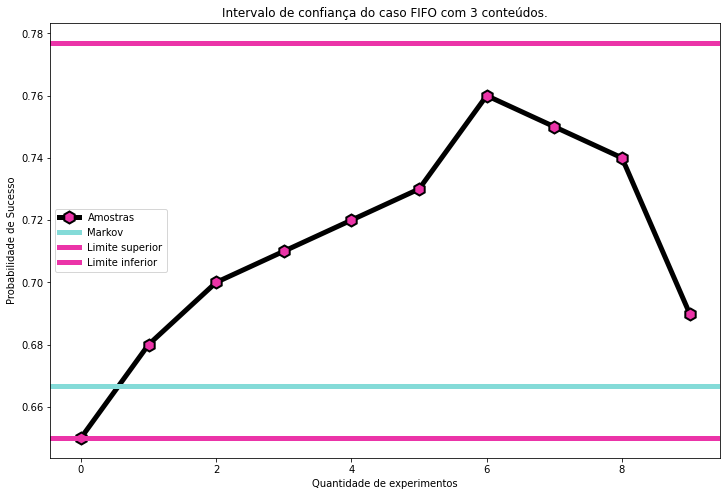

In [248]:
str_tipo = 'FIFO'
lim_sup = 0.777
lim_inf = 0.65
num_elem = 3
tipo = fifo1_3
cenario = 1

plotar_intervalo(tipo, str_tipo, sucessos, lim_sup, lim_inf, num_elem, cenario)

 ## Cenário 1: 3 Conteúdos

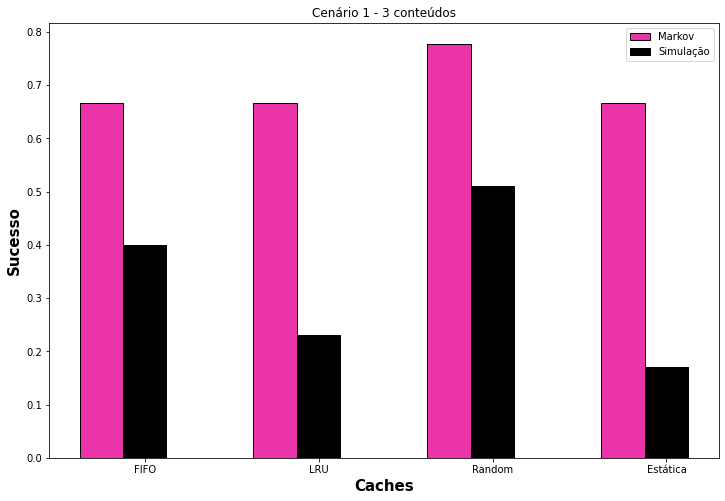

In [226]:
markov = [fifo1_3, lru1_3, random1_3, estatico1_3]
simulacao = [0.4, 0.23, 0.51, 0.17]

plotar_barras(markov, simulacao)

 ## Cenário 1: 4 Conteúdos

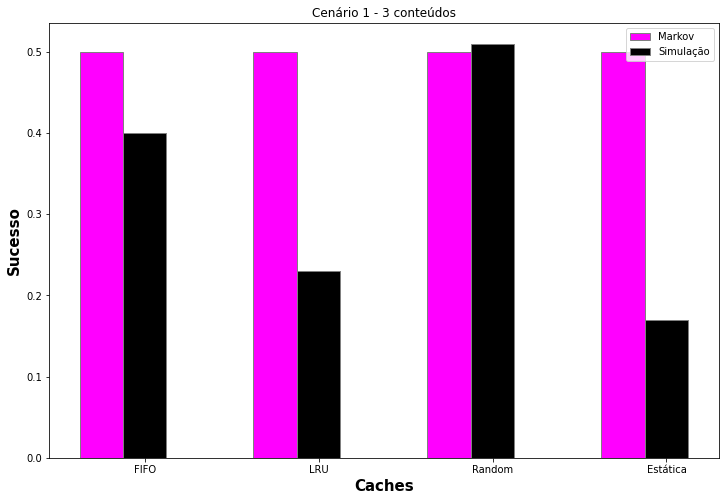

In [131]:
markov = [fifo1_4, lru1_4, random1_4, estatico1_4]
simulacao = [0.4, 0.23, 0.51, 0.17]

plotar_barras(markov, simulacao)

 ## Cenário 2: 3 Conteúdos

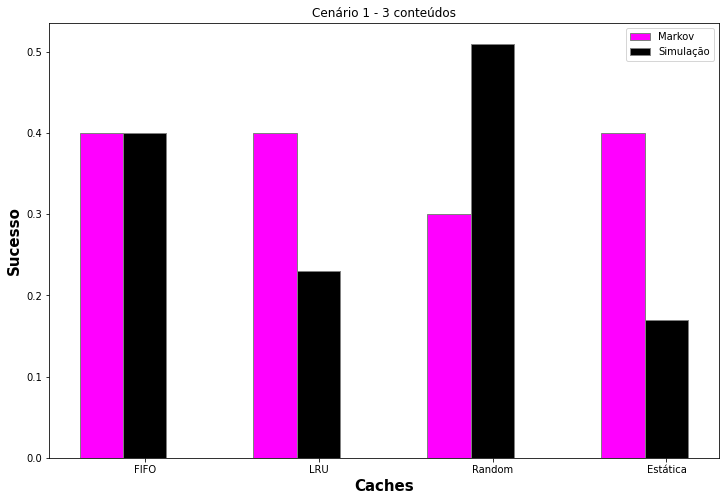

In [149]:
markov = [fifo2_3, lru2_3, random2_3, estatico2_3]
simulacao = [0.4, 0.23, 0.51, 0.17]

plotar_barras(markov, simulacao)

 ## Cenário 2: 4 Conteúdos

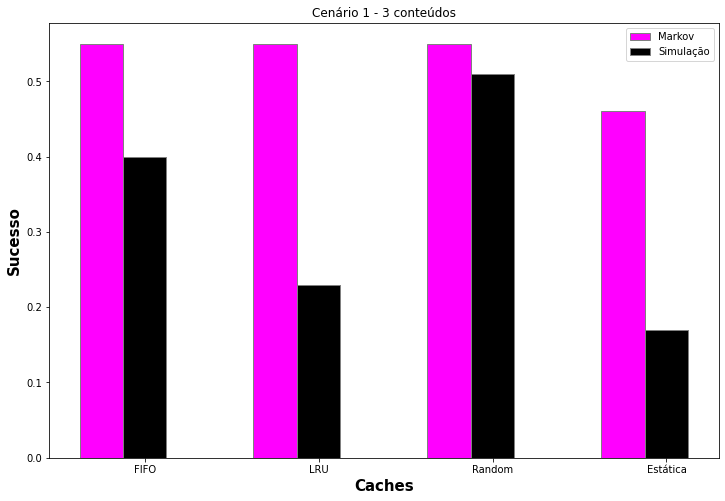

In [160]:
markov = [fifo2_4, lru2_4, random2_4, estatico2_4]
simulacao = [0.4, 0.23, 0.51, 0.17]

plotar_barras(markov, simulacao)